# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [73]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [74]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [75]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [76]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [77]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [78]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fares = total_fares / total_rides
avg_ride_fares

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [79]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fares = total_fares / total_drivers
avg_driver_fares

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [80]:
#  6. Create a PyBer summary DataFrame. 

type_summary_df = pd.DataFrame(
        {"Total Rides": total_rides,
          "Total Drivers": total_drivers,
          "Total Fares": total_fares,
          "Average Ride Fares": avg_ride_fares,
          "Average Driver Fares": avg_driver_fares})
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Ride Fares,Average Driver Fares
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [81]:
#  7. Cleaning up the DataFrame. Delete the index name
type_summary_df.index.name = None

In [82]:
#  8. Format the columns.

type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:.0f}".format)

type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:.0f}".format)

type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map('${:,.2f}'.format)

type_summary_df["Average Ride Fares"] = type_summary_df["Average Ride Fares"].map('${:,.2f}'.format)

type_summary_df["Average Driver Fares"] = type_summary_df["Average Driver Fares"].map('{:,.2f}'.format)

type_summary_df



,Total Rides,Total Drivers,Total Fares,Average Ride Fares,Average Driver Fares
Rural,125,78,"$4,327.93",$34.62,55.49
Suburban,625,490,"$19,356.33",$30.97,39.50
Urban,1625,2405,"$39,854.38",$24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [83]:
# 1. Read the merged DataFrame


In [84]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [85]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [86]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [119]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

df = pyber_data_df.pivot(index = 'date', columns = 'type', values = 'fare')
df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [120]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

df.index = pd.to_datetime(df.index)

df.index


DatetimeIndex(['2019-01-01 00:08:16', '2019-01-01 00:46:46',
               '2019-01-01 02:07:24', '2019-01-01 03:46:50',
               '2019-01-01 05:23:21', '2019-01-01 09:45:36',
               '2019-01-01 12:32:48', '2019-01-01 14:40:14',
               '2019-01-01 14:42:25', '2019-01-01 14:52:06',
               ...
               '2019-05-07 20:05:15', '2019-05-07 20:22:19',
               '2019-05-07 20:40:29', '2019-05-08 01:54:18',
               '2019-05-08 02:31:25', '2019-05-08 04:20:00',
               '2019-05-08 04:39:49', '2019-05-08 07:29:01',
               '2019-05-08 11:38:35', '2019-05-08 13:10:18'],
              dtype='datetime64[ns]', name='date', length=2375, freq=None)

In [122]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [123]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample('W').sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


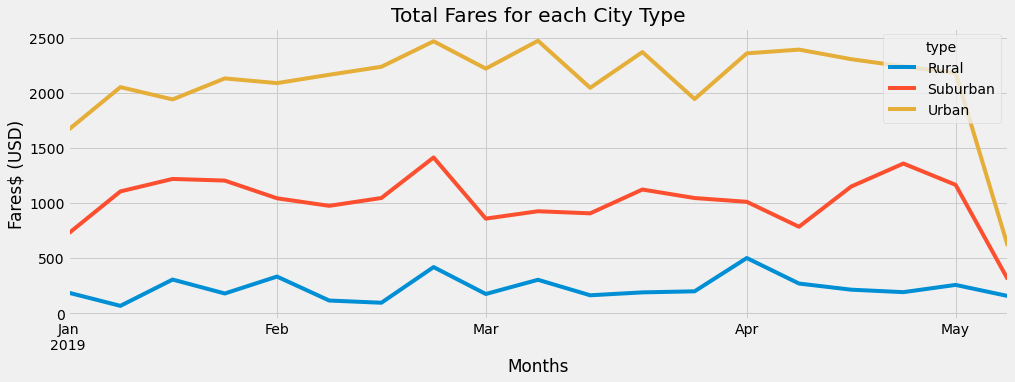

<Figure size 432x288 with 0 Axes>

In [133]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
df.plot(figsize = (15, 5))
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.xlabel("Months")
plt.ylabel("Fares$ (USD)")
plt.title('Total Fares for each City Type')


plt.show()

plt.savefig("analysis/PyBer_fare_summary.png")

